In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib inline

Matplotlib is building the font cache using fc-list. This may take a moment.


In [2]:
project_dir_path = '/n/data1/hms/dbmi/farhat/Roger/gatesMRI/Projects/Biomarkers'

#### Load Packages

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import MaxNLocator
from matplotlib.gridspec import GridSpec
import matplotlib.pylab as pl
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import fastcluster
from scipy.cluster.hierarchy import dendrogram
import scipy.cluster.hierarchy as hier
import networkx as nx
import networkx.algorithms.community as nxcom
import community
from collections import Counter
import pickle
import gseapy as gp

import warnings
warnings.filterwarnings('ignore')

#for exporting to Adobe Illustrator
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

Create directory for figures

In [4]:
figures_dir_path = f'{project_dir_path}/Figures/Notebook 6'
if not os.path.exists(figures_dir_path):
    os.makedirs(figures_dir_path)

Specify directory paths

In [5]:
#directoy for Pickled Objects
pickled_objects_dir = f'{project_dir_path}/Data/Pickled Files/'

#specify directory for Gene Set Files
Gene_Set_dir = f'{project_dir_path}/Data/Gene Set Files/CSV files/'

#specify directory for Data
Data_files_dir =f'{project_dir_path}/Data/'

Create directory for top weighted nodes (gene lists)

In [6]:
if not os.path.exists(f'{pickled_objects_dir}Network Files/top weighted node lists'): 
    os.makedirs(f'{pickled_objects_dir}Network Files/top weighted node lists')

Set parameters for plotting

In [7]:
plt.style.use('ggplot')
plt.rcParams['lines.linewidth']=1.0
plt.rcParams['axes.facecolor']='1.0'
plt.rcParams['xtick.color']='black'
plt.rcParams['axes.grid']=False
plt.rcParams['axes.edgecolor']='black'
plt.rcParams['grid.color']= '1.0'
plt.rcParams.update({'font.size': 14})

## [1] Load Data

#### Networks

In [8]:
G_ATB_HC = nx.read_gpickle(pickled_objects_dir + 'Network Files/networks/ATB_v_HC.pkl')
G_ATB_LTBI = nx.read_gpickle(pickled_objects_dir + 'Network Files/networks/ATB_v_LTBI.pkl')
G_ATB_OD = nx.read_gpickle(pickled_objects_dir + 'Network Files/networks/ATB_v_OD.pkl')

In [9]:
print(nx.info(G_ATB_HC))

Name: 
Type: Graph
Number of nodes: 3005
Number of edges: 672127
Average degree: 447.3391


In [10]:
print(nx.info(G_ATB_LTBI))

Name: 
Type: Graph
Number of nodes: 2670
Number of edges: 683108
Average degree: 511.6914


In [11]:
print(nx.info(G_ATB_OD))

Name: 
Type: Graph
Number of nodes: 67
Number of edges: 326
Average degree:   9.7313


#### Weighted Degrees for Nodes (genes)

In [12]:
weighted_deg_ATB_HC_series = pd.read_pickle(pickled_objects_dir + 'Network Files/weighted degree series/ATB_v_HC.pkl')
weighted_deg_ATB_LTBI_series = pd.read_pickle(pickled_objects_dir + 'Network Files/weighted degree series/ATB_v_LTBI.pkl')
weighted_deg_ATB_OD_series = pd.read_pickle(pickled_objects_dir + 'Network Files/weighted degree series/ATB_v_OD.pkl')

In [13]:
np.shape(weighted_deg_ATB_HC_series)

(3005,)

In [14]:
np.shape(weighted_deg_ATB_LTBI_series)

(2670,)

In [15]:
np.shape(weighted_deg_ATB_OD_series)

(67,)

#### Mean $log_2(Fold Change)$ for Nodes (genes)

In [16]:
mean_logFC_ATB_HC_series = pd.read_pickle(pickled_objects_dir + 'Network Files/mean logFC network nodes series/ATB_v_HC.pkl')
mean_logFC_ATB_LTBI_series = pd.read_pickle(pickled_objects_dir + 'Network Files/mean logFC network nodes series/ATB_v_LTBI.pkl')
mean_logFC_ATB_OD_series = pd.read_pickle(pickled_objects_dir + 'Network Files/mean logFC network nodes series/ATB_v_OD.pkl')

In [17]:
np.shape(mean_logFC_ATB_HC_series)

(3005,)

In [18]:
np.shape(mean_logFC_ATB_LTBI_series)

(2670,)

In [19]:
np.shape(mean_logFC_ATB_OD_series)

(67,)

## [2] Compare Weighted Degree to Mean $log_2(Fold Change)$ *within* each network

### Highlight *top 100 nodes* by weighted degree for each network

In [20]:
top_N_nodes = 100

### [2.1] ATB v HC

In [21]:
ATB_HC_df = pd.DataFrame(index = mean_logFC_ATB_HC_series.index)
ATB_HC_df['mean_log2FC'] = mean_logFC_ATB_HC_series.values
ATB_HC_df['weighted_degree'] = weighted_deg_ATB_HC_series[mean_logFC_ATB_HC_series.index].values

#### Distributions of *Weighted Degree* and *mean log2(Fold Change)*

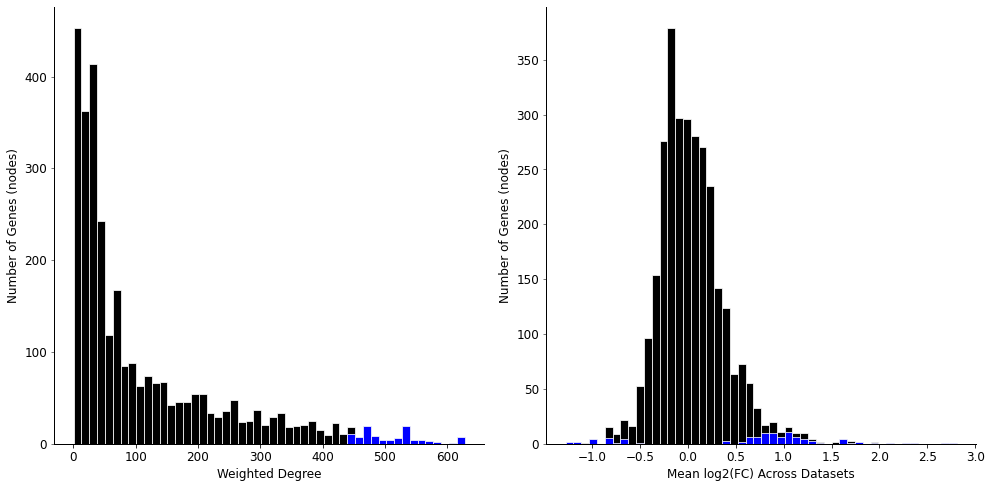

In [22]:
fig = plt.figure(constrained_layout=True)

gs = GridSpec(1, 2, figure=fig)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

#WEIGHTED DEGREE CENTRALITY
n, bins, patches = ax1.hist(ATB_HC_df.weighted_degree , bins = 50, color = 'black' , rwidth = 1.0 , edgecolor='white', linewidth=0.75)
ax1.hist(ATB_HC_df.sort_values(by = 'weighted_degree', ascending = False).weighted_degree.head(n=top_N_nodes) , bins = bins, color = 'blue' , rwidth = 1.0 , edgecolor='white', linewidth=0.75)

ax1.set_ylabel(f'Number of Genes (nodes)', fontsize = 12, color = 'k')
ax1.set_xlabel('Weighted Degree' , fontsize = 12, color = 'k')

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.grid(False)
ax1.tick_params(labelcolor = 'k')
ax1.tick_params(axis='y', which='major', labelsize=12 , labelcolor = 'k')
ax1.tick_params(axis='x', which='major', labelsize=12 , labelcolor = 'k')
    
#Log2(FC)
n, bins, patches = ax2.hist(ATB_HC_df.mean_log2FC , bins = 50, color = 'black' , rwidth = 1.0 , edgecolor='white', linewidth=0.75)
ax2.hist(ATB_HC_df.sort_values(by = 'weighted_degree', ascending = False).mean_log2FC.head(n=top_N_nodes) , bins = bins, color = 'blue' , rwidth = 1.0 , edgecolor='white', linewidth=0.75)

ax2.set_ylabel(f'Number of Genes (nodes)', fontsize = 12, color = 'k')
ax2.set_xlabel('Mean log2(FC) Across Datasets' , fontsize = 12, color = 'k')

ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.grid(False)
ax2.tick_params(labelcolor = 'k')
ax2.tick_params(axis='y', which='major', labelsize=12 , labelcolor = 'k')
ax2.tick_params(axis='x', which='major', labelsize=12 , labelcolor = 'k')
    
################### Plot ###################
fig = plt.gcf()
fig.set_size_inches(14, 7.0)
fig.tight_layout()

file_name = f'{figures_dir_path}/ATB_HC_distributions_of_weighted_degree_and_mean_logFC.pdf'
plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

plt.show()

#### Weighted Degree vs mean log2(Fold Change)

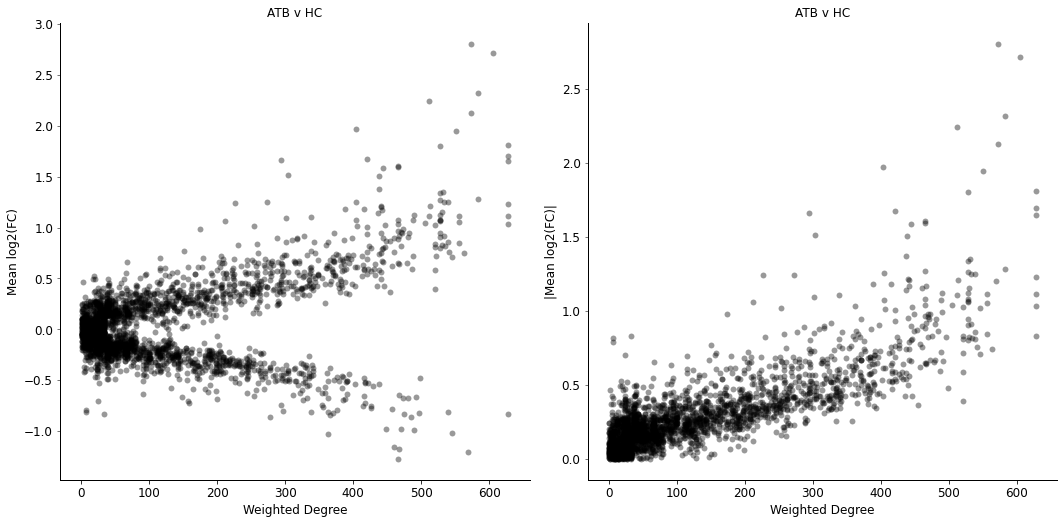

In [23]:
fig = plt.figure(constrained_layout=True)

gs = GridSpec(1, 2, figure=fig)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

#PLOT 1: Log2(FC) vs. weighted degree
ax1.scatter(ATB_HC_df.weighted_degree, ATB_HC_df.mean_log2FC , color = "black" , linewidth=0.0 , edgecolor = 'black' , s = 35 , alpha = 0.4)

ax1.set_title('ATB v HC', fontsize = 12, color = 'k')
ax1.set_ylabel('Mean log2(FC)', fontsize = 12, color = 'k')
ax1.set_xlabel('Weighted Degree' , fontsize = 12, color = 'k')

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.grid(False)
ax1.tick_params(labelcolor = 'k')
ax1.tick_params(axis='y', which='major', labelsize=12 , labelcolor = 'k')
ax1.tick_params(axis='x', which='major', labelsize=12 , labelcolor = 'k')
    
#PLOT 2: absolute(Log2(FC)) vs. weighted degree
ax2.scatter(ATB_HC_df.weighted_degree, abs(ATB_HC_df.mean_log2FC) , color = "black" , linewidth=0.0 , edgecolor = 'black' , s = 35 , alpha = 0.4)

ax2.set_title('ATB v HC', fontsize = 12, color = 'k')
ax2.set_ylabel('|Mean log2(FC)|', fontsize = 12, color = 'k')
ax2.set_xlabel('Weighted Degree' , fontsize = 12, color = 'k')

ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.grid(False)
ax2.tick_params(labelcolor = 'k')
ax2.tick_params(axis='y', which='major', labelsize=12 , labelcolor = 'k')
ax2.tick_params(axis='x', which='major', labelsize=12 , labelcolor = 'k')
    
################### Plot ###################
fig = plt.gcf()
fig.set_size_inches(15, 7.5)
fig.tight_layout()

file_name = f'{figures_dir_path}/ATB_HC_volcano_plots.pdf'
plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

plt.show()

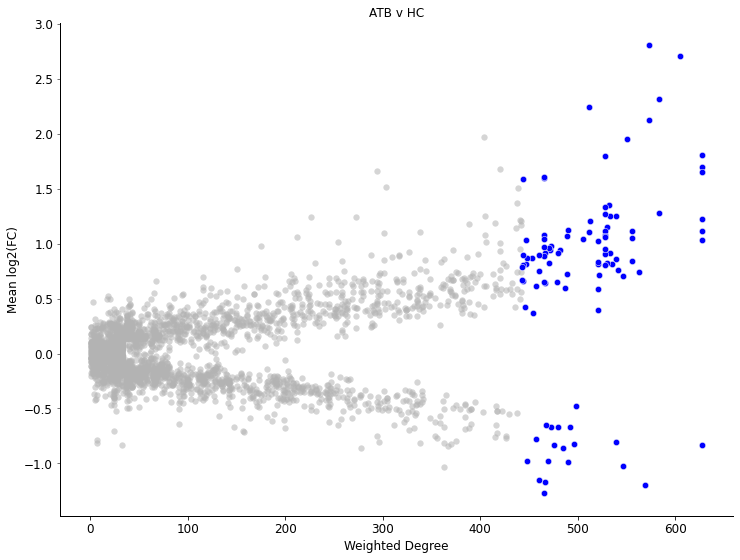

In [24]:
fig , ax = plt.subplots()

ax.scatter(ATB_HC_df.weighted_degree, ATB_HC_df.mean_log2FC , color = "0.7" , linewidth=0.0 , edgecolor = 'black' , s = 40 , alpha = 0.55)

#highlight the top N nodes by weighted degree
ax.scatter(ATB_HC_df.sort_values(by = 'weighted_degree', ascending = False).weighted_degree.head(n=top_N_nodes) , ATB_HC_df.sort_values(by = 'weighted_degree', ascending = False).mean_log2FC.head(n=top_N_nodes) , color = 'blue' , linewidth=0.5 , edgecolor = 'white' , s = 40 , alpha = 1.0)

ax.set_title('ATB v HC', fontsize = 12, color = 'k')
ax.set_ylabel('Mean log2(FC)', fontsize = 12, color = 'k')
ax.set_xlabel('Weighted Degree' , fontsize = 12, color = 'k')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(False)
ax.tick_params(labelcolor = 'k')
ax.tick_params(axis='y', which='major', labelsize=12 , labelcolor = 'k')
ax.tick_params(axis='x', which='major', labelsize=12 , labelcolor = 'k')

fig = plt.gcf()
fig.set_size_inches(10.5, 8.0)
fig.tight_layout()

file_name = f'{figures_dir_path}/ATB_HC_volcano_plot_top_100_weighted_nodeshighlighted.pdf'
plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

plt.show()

In [25]:
ATB_HC_df.sort_values(by = ['weighted_degree','mean_log2FC'] , ascending = [False,False]).head(n = 5)

,mean_log2FC,weighted_degree
GBP5,1.808402,627.8
IFITM3,1.698333,627.8
AIM2,1.649580,627.8
SAMD9L,1.229418,627.8
CARD16,1.112804,627.8


In [26]:
ATB_HC_df.sort_values(by = ['mean_log2FC','weighted_degree'] , ascending = [False,False]).tail(n = 5)

,mean_log2FC,weighted_degree
LRRN3,-1.030773,362.333333
PASK,-1.152869,460.333333
ID3,-1.170676,466.666667
CCR7,-1.201009,568.933333
NELL2,-1.273472,465.400000


### [2.2] ATB v LTBI

In [27]:
ATB_LTBI_df = pd.DataFrame(index = mean_logFC_ATB_LTBI_series.index)
ATB_LTBI_df['mean_log2FC'] = mean_logFC_ATB_LTBI_series.values
ATB_LTBI_df['weighted_degree'] = weighted_deg_ATB_LTBI_series[mean_logFC_ATB_LTBI_series.index].values

#### Distributions of *Weighted Degree* and *mean log2(Fold Change)*

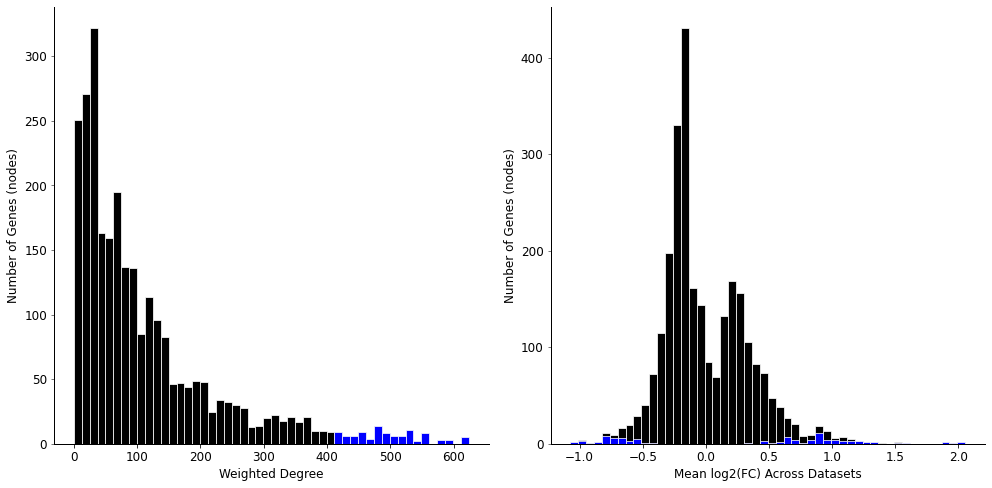

In [28]:
fig = plt.figure(constrained_layout=True)

gs = GridSpec(1, 2, figure=fig)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

#WEIGHTED DEGREE CENTRALITY
n, bins, patches = ax1.hist(ATB_LTBI_df.weighted_degree , bins = 50, color = 'black' , rwidth = 1.0 , edgecolor='white', linewidth=0.75)
ax1.hist(ATB_LTBI_df.sort_values(by = 'weighted_degree', ascending = False).weighted_degree.head(n=top_N_nodes) , bins = bins, color = 'blue' , rwidth = 1.0 , edgecolor='white', linewidth=0.75)

ax1.set_ylabel(f'Number of Genes (nodes)', fontsize = 12, color = 'k')
ax1.set_xlabel('Weighted Degree' , fontsize = 12, color = 'k')

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.grid(False)
ax1.tick_params(labelcolor = 'k')
ax1.tick_params(axis='y', which='major', labelsize=12 , labelcolor = 'k')
ax1.tick_params(axis='x', which='major', labelsize=12 , labelcolor = 'k')
    
#Log2(FC)
n, bins, patches = ax2.hist(ATB_LTBI_df.mean_log2FC , bins = 50, color = 'black' , rwidth = 1.0 , edgecolor='white', linewidth=0.75)
ax2.hist(ATB_LTBI_df.sort_values(by = 'weighted_degree', ascending = False).mean_log2FC.head(n=top_N_nodes) , bins = bins, color = 'blue' , rwidth = 1.0 , edgecolor='white', linewidth=0.75)

ax2.set_ylabel(f'Number of Genes (nodes)', fontsize = 12, color = 'k')
ax2.set_xlabel('Mean log2(FC) Across Datasets' , fontsize = 12, color = 'k')

ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.grid(False)
ax2.tick_params(labelcolor = 'k')
ax2.tick_params(axis='y', which='major', labelsize=12 , labelcolor = 'k')
ax2.tick_params(axis='x', which='major', labelsize=12 , labelcolor = 'k')
    
################### Plot ###################
fig = plt.gcf()
fig.set_size_inches(14, 7.0)
fig.tight_layout()

file_name = f'{figures_dir_path}/ATB_LTBI_distributions_of_weighted_degree_and_mean_logFC.pdf'
plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

plt.show()

#### Weighted Degree vs mean log2(Fold Change)

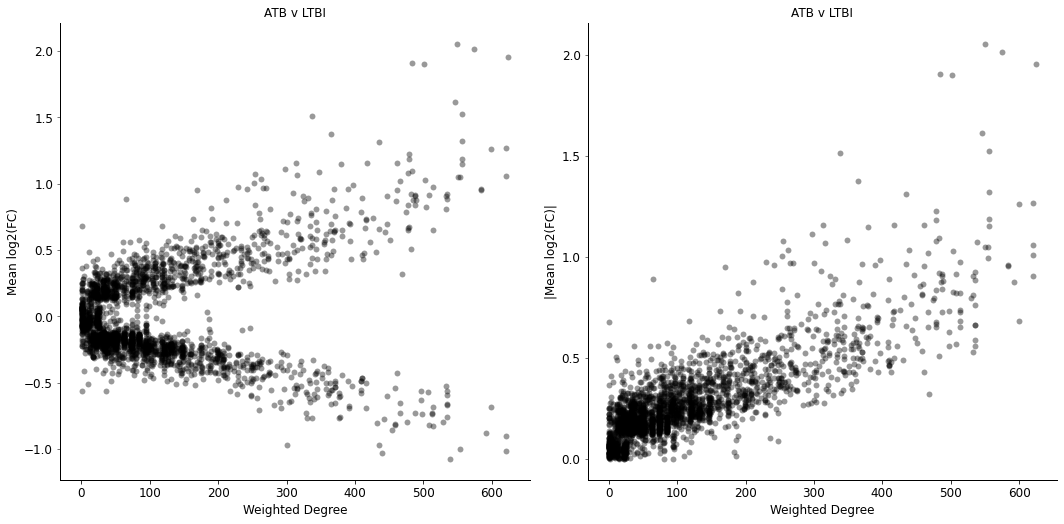

In [29]:
fig = plt.figure(constrained_layout=True)

gs = GridSpec(1, 2, figure=fig)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

#PLOT 1: Log2(FC) vs. weighted degree
ax1.scatter(ATB_LTBI_df.weighted_degree, ATB_LTBI_df.mean_log2FC , color = "black" , linewidth=0.0 , edgecolor = 'black' , s = 35 , alpha = 0.4)

ax1.set_title('ATB v LTBI', fontsize = 12, color = 'k')
ax1.set_ylabel('Mean log2(FC)', fontsize = 12, color = 'k')
ax1.set_xlabel('Weighted Degree' , fontsize = 12, color = 'k')

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.grid(False)
ax1.tick_params(labelcolor = 'k')
ax1.tick_params(axis='y', which='major', labelsize=12 , labelcolor = 'k')
ax1.tick_params(axis='x', which='major', labelsize=12 , labelcolor = 'k')
    
#PLOT 2: absolute(Log2(FC)) vs. weighted degree
ax2.scatter(ATB_LTBI_df.weighted_degree, abs(ATB_LTBI_df.mean_log2FC) , color = "black" , linewidth=0.0 , edgecolor = 'black' , s = 35 , alpha = 0.4)

ax2.set_title('ATB v LTBI', fontsize = 12, color = 'k')
ax2.set_ylabel('|Mean log2(FC)|', fontsize = 12, color = 'k')
ax2.set_xlabel('Weighted Degree' , fontsize = 12, color = 'k')

ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.grid(False)
ax2.tick_params(labelcolor = 'k')
ax2.tick_params(axis='y', which='major', labelsize=12 , labelcolor = 'k')
ax2.tick_params(axis='x', which='major', labelsize=12 , labelcolor = 'k')
    
################### Plot ###################
fig = plt.gcf()
fig.set_size_inches(15, 7.5)
fig.tight_layout()

file_name = f'{figures_dir_path}/ATB_LTBI_volcano_plots.pdf'
plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

plt.show()

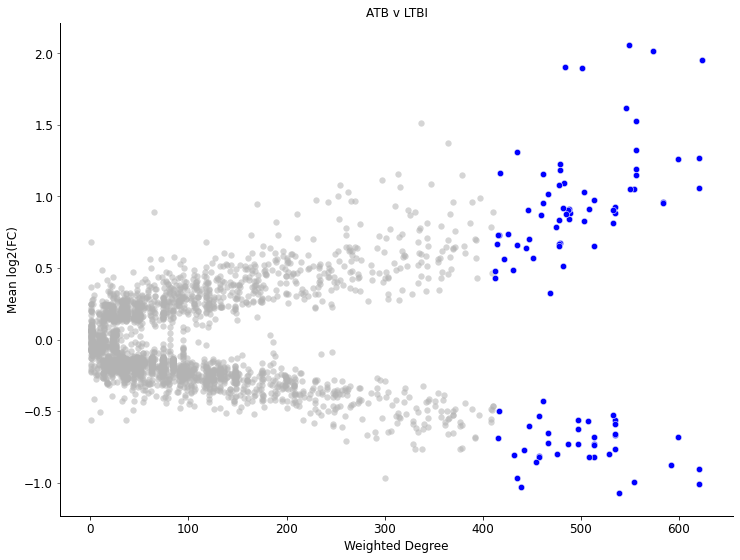

In [30]:
fig , ax = plt.subplots()

ax.scatter(ATB_LTBI_df.weighted_degree, ATB_LTBI_df.mean_log2FC , color = "0.7" , linewidth=0.0 , edgecolor = 'black' , s = 40 , alpha = 0.55)

#highlight the top N nodes by weighted degree
ax.scatter(ATB_LTBI_df.sort_values(by = 'weighted_degree', ascending = False).weighted_degree.head(n=top_N_nodes) , ATB_LTBI_df.sort_values(by = 'weighted_degree', ascending = False).mean_log2FC.head(n=top_N_nodes) , color = 'blue' , linewidth=0.5 , edgecolor = 'white' , s = 40 , alpha = 1.0)

ax.set_title('ATB v LTBI', fontsize = 12, color = 'k')
ax.set_ylabel('Mean log2(FC)', fontsize = 12, color = 'k')
ax.set_xlabel('Weighted Degree' , fontsize = 12, color = 'k')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(False)
ax.tick_params(labelcolor = 'k')
ax.tick_params(axis='y', which='major', labelsize=12 , labelcolor = 'k')
ax.tick_params(axis='x', which='major', labelsize=12 , labelcolor = 'k')

fig = plt.gcf()
fig.set_size_inches(10.5, 8.0)
fig.tight_layout()

file_name = f'{figures_dir_path}/ATB_LTBI_volcano_plot_top_100_weighted_nodeshighlighted.pdf'
plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

plt.show()

In [31]:
ATB_LTBI_df.sort_values(by = ['weighted_degree','mean_log2FC'] , ascending = [False,False]).head(n = 5)

,mean_log2FC,weighted_degree
FCGR1B,1.955971,624.0625
FBXO6,1.269424,620.1875
IFITM3,1.059062,620.1875
IL7R,-0.904867,620.1875
CCR7,-1.010705,620.1875


In [32]:
ATB_LTBI_df.sort_values(by = ['mean_log2FC','weighted_degree'] , ascending = [False,False]).tail(n = 5)

,mean_log2FC,weighted_degree
FCGBP,-0.968003,300.6250
S1PR1,-0.996190,554.3125
CCR7,-1.010705,620.1875
NELL2,-1.032864,439.5000
GPR183,-1.075041,538.5625


### [2.3] ATB v OD

In [33]:
ATB_OD_df = pd.DataFrame(index = mean_logFC_ATB_OD_series.index)
ATB_OD_df['mean_log2FC'] = mean_logFC_ATB_OD_series.values
ATB_OD_df['weighted_degree'] = weighted_deg_ATB_OD_series[mean_logFC_ATB_OD_series.index].values

#### Distributions of *Weighted Degree* and *mean log2(Fold Change)*

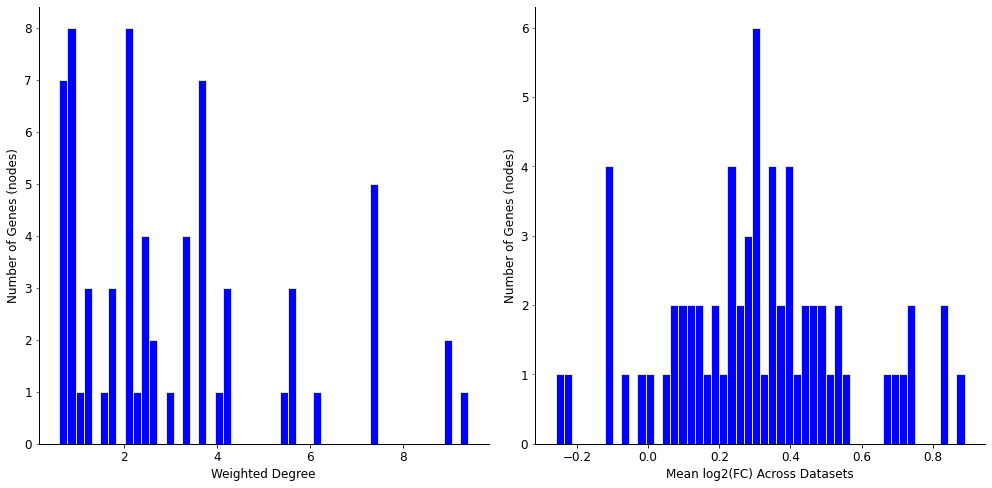

In [34]:
fig = plt.figure(constrained_layout=True)

gs = GridSpec(1, 2, figure=fig)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

#WEIGHTED DEGREE CENTRALITY
n, bins, patches = ax1.hist(ATB_OD_df.weighted_degree , bins = 50, color = 'black' , rwidth = 1.0 , edgecolor='white', linewidth=0.75)
ax1.hist(ATB_OD_df.sort_values(by = 'weighted_degree', ascending = False).weighted_degree.head(n=top_N_nodes) , bins = bins, color = 'blue' , rwidth = 1.0 , edgecolor='white', linewidth=0.75)

ax1.set_ylabel(f'Number of Genes (nodes)', fontsize = 12, color = 'k')
ax1.set_xlabel('Weighted Degree' , fontsize = 12, color = 'k')

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.grid(False)
ax1.tick_params(labelcolor = 'k')
ax1.tick_params(axis='y', which='major', labelsize=12 , labelcolor = 'k')
ax1.tick_params(axis='x', which='major', labelsize=12 , labelcolor = 'k')
    
#Log2(FC)
n, bins, patches = ax2.hist(ATB_OD_df.mean_log2FC , bins = 50, color = 'black' , rwidth = 1.0 , edgecolor='white', linewidth=0.75)
ax2.hist(ATB_OD_df.sort_values(by = 'weighted_degree', ascending = False).mean_log2FC.head(n=top_N_nodes) , bins = bins, color = 'blue' , rwidth = 1.0 , edgecolor='white', linewidth=0.75)

ax2.set_ylabel(f'Number of Genes (nodes)', fontsize = 12, color = 'k')
ax2.set_xlabel('Mean log2(FC) Across Datasets' , fontsize = 12, color = 'k')

ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.grid(False)
ax2.tick_params(labelcolor = 'k')
ax2.tick_params(axis='y', which='major', labelsize=12 , labelcolor = 'k')
ax2.tick_params(axis='x', which='major', labelsize=12 , labelcolor = 'k')
    
################### Plot ###################
fig = plt.gcf()
fig.set_size_inches(14, 7.0)
fig.tight_layout()

file_name = f'{figures_dir_path}/ATB_OD_distributions_of_weighted_degree_and_mean_logFC.pdf'
plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

plt.show()

#### Weighted Degree vs mean log2(Fold Change)

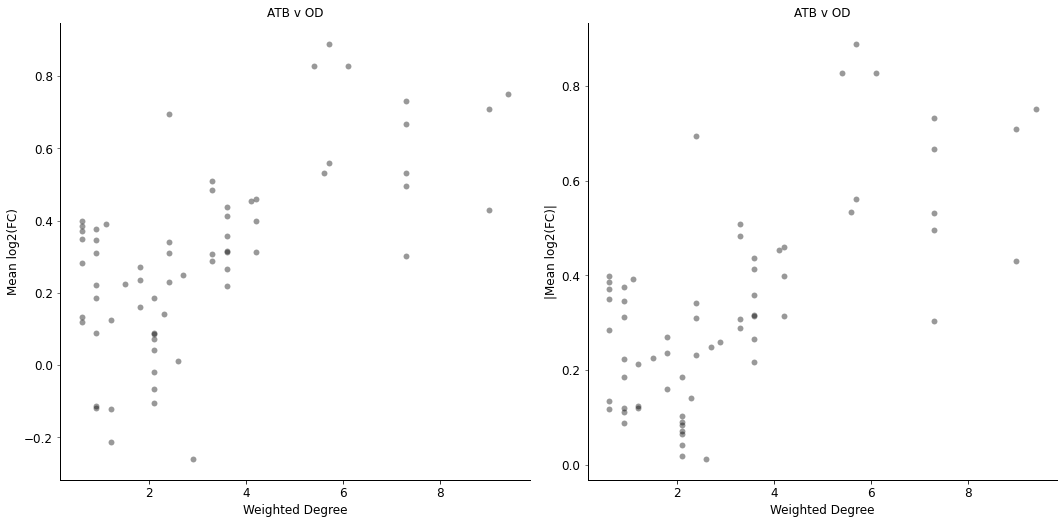

In [35]:
fig = plt.figure(constrained_layout=True)

gs = GridSpec(1, 2, figure=fig)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

#PLOT 1: Log2(FC) vs. weighted degree
ax1.scatter(ATB_OD_df.weighted_degree, ATB_OD_df.mean_log2FC , color = "black" , linewidth=0.0 , edgecolor = 'black' , s = 35 , alpha = 0.4)

ax1.set_title('ATB v OD', fontsize = 12, color = 'k')
ax1.set_ylabel('Mean log2(FC)', fontsize = 12, color = 'k')
ax1.set_xlabel('Weighted Degree' , fontsize = 12, color = 'k')

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.grid(False)
ax1.tick_params(labelcolor = 'k')
ax1.tick_params(axis='y', which='major', labelsize=12 , labelcolor = 'k')
ax1.tick_params(axis='x', which='major', labelsize=12 , labelcolor = 'k')
    
#PLOT 2: absolute(Log2(FC)) vs. weighted degree
ax2.scatter(ATB_OD_df.weighted_degree, abs(ATB_OD_df.mean_log2FC) , color = "black" , linewidth=0.0 , edgecolor = 'black' , s = 35 , alpha = 0.4)

ax2.set_title('ATB v OD', fontsize = 12, color = 'k')
ax2.set_ylabel('|Mean log2(FC)|', fontsize = 12, color = 'k')
ax2.set_xlabel('Weighted Degree' , fontsize = 12, color = 'k')

ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.grid(False)
ax2.tick_params(labelcolor = 'k')
ax2.tick_params(axis='y', which='major', labelsize=12 , labelcolor = 'k')
ax2.tick_params(axis='x', which='major', labelsize=12 , labelcolor = 'k')
    
################### Plot ###################
fig = plt.gcf()
fig.set_size_inches(15, 7.5)
fig.tight_layout()

file_name = f'{figures_dir_path}/ATB_OD_volcano_plots.pdf'
plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

plt.show()

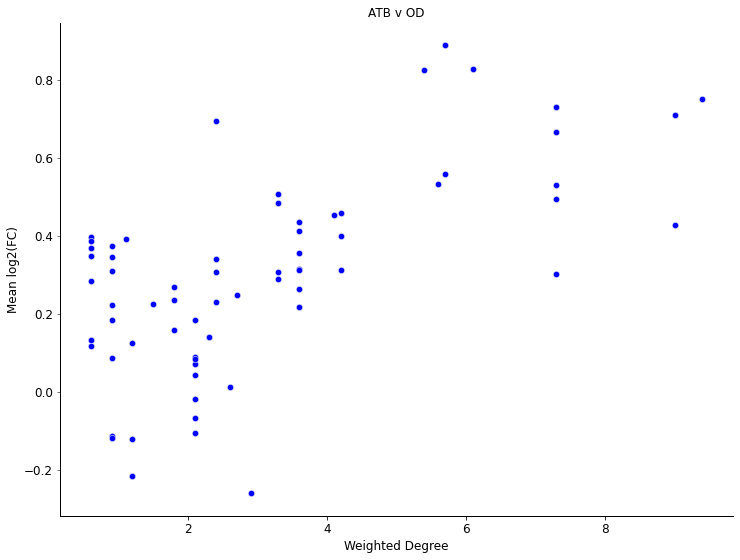

In [36]:
fig , ax = plt.subplots()

ax.scatter(ATB_OD_df.weighted_degree, ATB_OD_df.mean_log2FC , color = "0.7" , linewidth=0.0 , edgecolor = 'black' , s = 40 , alpha = 0.55)

#highlight the top N nodes by weighted degree
ax.scatter(ATB_OD_df.sort_values(by = 'weighted_degree', ascending = False).weighted_degree.head(n=top_N_nodes) , ATB_OD_df.sort_values(by = 'weighted_degree', ascending = False).mean_log2FC.head(n=top_N_nodes) , color = 'blue' , linewidth=0.5 , edgecolor = 'white' , s = 40 , alpha = 1.0)

ax.set_title('ATB v OD', fontsize = 12, color = 'k')
ax.set_ylabel('Mean log2(FC)', fontsize = 12, color = 'k')
ax.set_xlabel('Weighted Degree' , fontsize = 12, color = 'k')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(False)
ax.tick_params(labelcolor = 'k')
ax.tick_params(axis='y', which='major', labelsize=12 , labelcolor = 'k')
ax.tick_params(axis='x', which='major', labelsize=12 , labelcolor = 'k')

fig = plt.gcf()
fig.set_size_inches(10.5, 8.0)
fig.tight_layout()

file_name = f'{figures_dir_path}/ATB_OD_volcano_plot_top_67_weighted_nodeshighlighted.pdf'
plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

plt.show()

In [37]:
ATB_OD_df.sort_values(by = ['weighted_degree','mean_log2FC'] , ascending = [False,False]).head(n = 5)

,mean_log2FC,weighted_degree
BATF2,0.751017,9.4
FCGR1A,0.710203,9.0
VAMP5,0.430096,9.0
SERPING1,0.732517,7.3
GBP5,0.667358,7.3


In [38]:
ATB_OD_df.sort_values(by = ['mean_log2FC','weighted_degree'] , ascending = [False,False]).tail(n = 5)

,mean_log2FC,weighted_degree
SNORD3A,-0.112014,0.9
SNORD3D,-0.118909,0.9
S100A12,-0.119987,1.2
ZDHHC19,-0.213950,1.2
PCOLCE2,-0.259797,2.9


## [3] Compare top N nodes *by weighted degree* across networks

In [39]:
top_N_nodes_ATB_HC = set(ATB_HC_df.sort_values(by = 'weighted_degree', ascending = False).head(n=top_N_nodes).index)
top_N_nodes_ATB_LTBI = set(ATB_LTBI_df.sort_values(by = 'weighted_degree', ascending = False).head(n=top_N_nodes).index)
top_N_nodes_ATB_OD = set(ATB_OD_df.sort_values(by = 'weighted_degree', ascending = False).head(n=top_N_nodes).index)

In [40]:
len(top_N_nodes_ATB_HC)

100

In [41]:
len(top_N_nodes_ATB_LTBI)

100

In [42]:
len(top_N_nodes_ATB_OD)

67

### *Function* to visualize a set of genes in *mean log2(FC)* vs. *weighted degree* for all networks

In [43]:
def plot_logFC_v_meanlogFC_all_networks(gene_list, gene_list_name):
    
    fig = plt.figure(constrained_layout=True)

    gs = GridSpec(1, 3, figure=fig)

    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1])
    ax3 = fig.add_subplot(gs[0, 2])

    #ATB_HC
    ax1.scatter(ATB_HC_df.weighted_degree, ATB_HC_df.mean_log2FC , color = "0.7" , linewidth=0.0 , edgecolor = 'black' , s = 25 , alpha = 0.55)

    #filter for nodes in gene list
    gene_list_filter = [gene_i in gene_list for gene_i in ATB_HC_df.index]

    #highlight the top N nodes by weighted degree
    ax1.scatter(ATB_HC_df[gene_list_filter].weighted_degree , ATB_HC_df[gene_list_filter].mean_log2FC , color = 'blue' , linewidth=0.5 , edgecolor = 'white' , s = 25 , alpha = 1.0)

    ax1.set_title('ATB v HC', fontsize = 12, color = 'k')
    ax1.set_ylabel('Mean log2(FC)', fontsize = 12, color = 'k')
    ax1.set_xlabel('Weighted Degree' , fontsize = 12, color = 'k')

    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.grid(False)
    ax1.tick_params(labelcolor = 'k')
    ax1.tick_params(axis='y', which='major', labelsize=12 , labelcolor = 'k')
    ax1.tick_params(axis='x', which='major', labelsize=12 , labelcolor = 'k')

    #ATB_LTBI
    ax2.scatter(ATB_LTBI_df.weighted_degree, ATB_LTBI_df.mean_log2FC , color = "0.7" , linewidth=0.0 , edgecolor = 'black' , s = 25 , alpha = 0.55)

    #filter for nodes in gene list
    gene_list_filter = [gene_i in gene_list for gene_i in ATB_LTBI_df.index]

    #highlight the top N nodes by weighted degree
    ax2.scatter(ATB_LTBI_df[gene_list_filter].weighted_degree , ATB_LTBI_df[gene_list_filter].mean_log2FC , color = 'blue' , linewidth=0.5 , edgecolor = 'white' , s = 25 , alpha = 1.0)

    ax2.set_title('ATB v LTBI', fontsize = 12, color = 'k')
    ax2.set_ylabel('Mean log2(FC)', fontsize = 12, color = 'k')
    ax2.set_xlabel('Weighted Degree' , fontsize = 12, color = 'k')

    ax2.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax2.grid(False)
    ax2.tick_params(labelcolor = 'k')
    ax2.tick_params(axis='y', which='major', labelsize=12 , labelcolor = 'k')
    ax2.tick_params(axis='x', which='major', labelsize=12 , labelcolor = 'k')

    #ATB_OD
    ax3.scatter(ATB_OD_df.weighted_degree, ATB_OD_df.mean_log2FC , color = "0.7" , linewidth=0.0 , edgecolor = 'black' , s = 25 , alpha = 0.55)

    #filter for nodes in gene list
    gene_list_filter = [gene_i in gene_list for gene_i in ATB_OD_df.index]

    #highlight the top N nodes by weighted degree
    ax3.scatter(ATB_OD_df[gene_list_filter].weighted_degree , ATB_OD_df[gene_list_filter].mean_log2FC , color = 'blue' , linewidth=0.5 , edgecolor = 'white' , s = 25 , alpha = 1.0)

    ax3.set_title('ATB v OD', fontsize = 12, color = 'k')
    ax3.set_ylabel('Mean log2(FC)', fontsize = 12, color = 'k')
    ax3.set_xlabel('Weighted Degree' , fontsize = 12, color = 'k')

    ax3.spines['right'].set_visible(False)
    ax3.spines['top'].set_visible(False)
    ax3.grid(False)
    ax3.tick_params(labelcolor = 'k')
    ax3.tick_params(axis='y', which='major', labelsize=12 , labelcolor = 'k')
    ax3.tick_params(axis='x', which='major', labelsize=12 , labelcolor = 'k')

    ################### Plot ###################
    fig = plt.gcf()
    fig.set_size_inches(16.5, 5.5)
    fig.tight_layout()
    
    file_name = f'{figures_dir_path}/{gene_list_name}_genes_highlighted_volcano_plot_across_networks.pdf'
    plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

    plt.show()

### [3.1] top nodes (genes) in only 1 network

ATB_HC - ATB_LTBI - ATB_OD

In [44]:
ATB_HC_only = top_N_nodes_ATB_HC - top_N_nodes_ATB_LTBI - top_N_nodes_ATB_OD

#pickle list of nodes for downstream analysis
with open(f'{pickled_objects_dir}Network Files/top weighted node lists/ATB_HC_only.pkl', 'wb') as f:
    pickle.dump(list(ATB_HC_only), f)

In [45]:
len(ATB_HC_only)

46

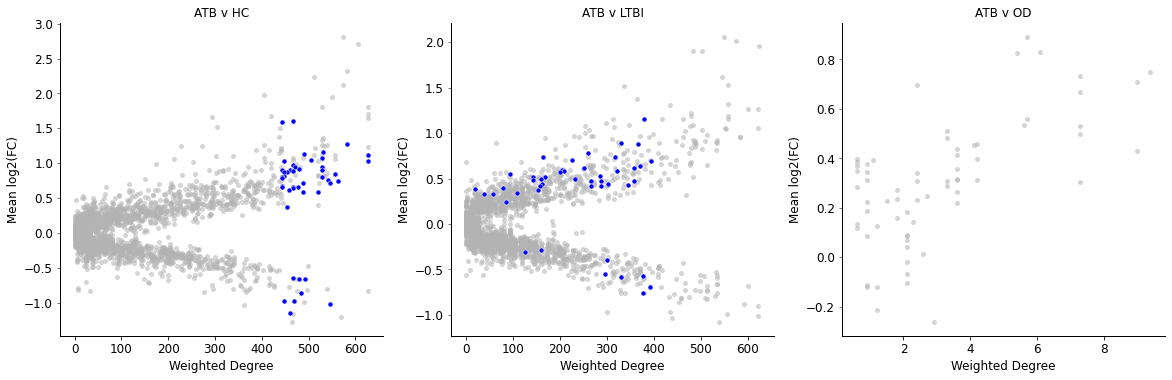

In [46]:
plot_logFC_v_meanlogFC_all_networks(ATB_HC_only, 'ATB_HC_only')

In [47]:
for gene_i in ATB_HC_only:
    print(gene_i + ', ')

LRRK2, 
LACTB, 
CD5, 
STX11, 
LTBR, 
NOD2, 
HP, 
RTP4, 
EPHA4, 
ACTA2, 
CARD16, 
GCH1, 
ZNF91, 
DDX58, 
STAT1, 
UBE2L6, 
MICU1, 
BST1, 
SLITRK4, 
SRBD1, 
KCNJ2, 
PSME2, 
ZNF438, 
DHRS3, 
LMNB1, 
STK3, 
TRAFD1, 
JAK2, 
EPB41L3, 
HCAR2, 
APOL6, 
DRAM1, 
PRRG4, 
TLR7, 
RSAD2, 
FAM102A, 
SQRDL, 
PASK, 
DDX60, 
SLC6A12, 
IFIH1, 
C5, 
STMN3, 
GBP2, 
SORT1, 
TSEN54, 


ATB_LTBI - ATB_HC - ATB_OD

In [48]:
ATB_LTBI_only = top_N_nodes_ATB_LTBI - top_N_nodes_ATB_HC - top_N_nodes_ATB_OD

#pickle list of nodes for downstream analysis
with open(f'{pickled_objects_dir}Network Files/top weighted node lists/ATB_LTBI_only.pkl', 'wb') as f:
    pickle.dump(list(ATB_LTBI_only), f)

In [49]:
len(ATB_LTBI_only)

50

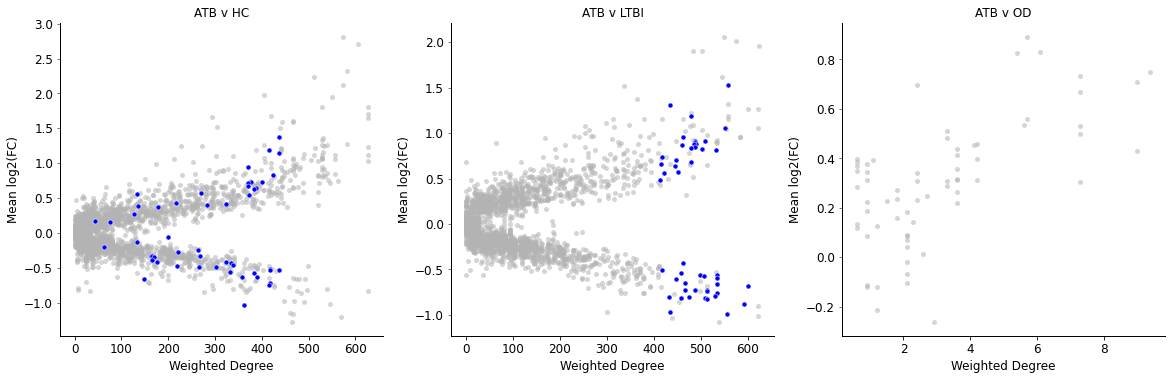

In [50]:
plot_logFC_v_meanlogFC_all_networks(ATB_LTBI_only, 'ATB_LTBI_only')

In [51]:
for gene_i in ATB_LTBI_only:
    print(gene_i + ', ')

HIST2H2BE, 
EOMES, 
MMP9, 
ITK, 
TXN, 
KREMEN1, 
SYTL2, 
MCEMP1, 
IFI35, 
MSRB2, 
GYG1, 
PRKCH, 
ITPR3, 
ASGR2, 
LEF1, 
S1PR1, 
CD247, 
CD96, 
KLHDC8B, 
SLC38A1, 
CA4, 
ST6GAL1, 
TNFAIP6, 
LRRN3, 
PLEKHA1, 
DYRK2, 
SLC26A8, 
FLVCR2, 
PYHIN1, 
SLAMF6, 
CASP1, 
SH2D1A, 
LCN2, 
CDC25B, 
SIGLEC5, 
LAX1, 
DEFA4, 
CAMP, 
ABLIM1, 
ETS1, 
BCL11B, 
ALPL, 
HIST1H1C, 
VPS9D1, 
FCRLA, 
CD79A, 
GZMK, 
CD27, 
LBH, 
TCN1, 


ATB_OD - ATB_HC - ATB_LTBI

In [52]:
ATB_OD_only = top_N_nodes_ATB_OD - top_N_nodes_ATB_HC - top_N_nodes_ATB_LTBI

#pickle list of nodes for downstream analysis
with open(f'{pickled_objects_dir}Network Files/top weighted node lists/ATB_OD_only.pkl', 'wb') as f:
    pickle.dump(list(ATB_OD_only), f)

In [53]:
len(ATB_OD_only)

33

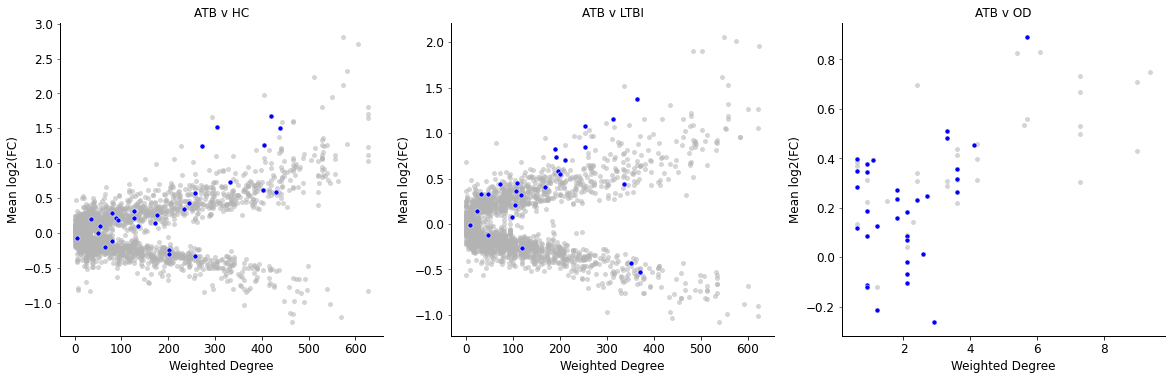

In [54]:
plot_logFC_v_meanlogFC_all_networks(ATB_OD_only, 'ATB_OD_only')

### [3.2] top nodes (genes) in 2 networks

(ATB_HC $\cap$ ATB_LTBI) - ATB_OD

In [55]:
ATB_HC_and_ATB_LTBI = top_N_nodes_ATB_HC.intersection(top_N_nodes_ATB_LTBI) - top_N_nodes_ATB_OD

#pickle list of nodes for downstream analysis
with open(f'{pickled_objects_dir}Network Files/top weighted node lists/ATB_HC_and_ATB_LTBI.pkl', 'wb') as f:
    pickle.dump(list(ATB_HC_and_ATB_LTBI), f)

In [56]:
len(ATB_HC_and_ATB_LTBI)

23

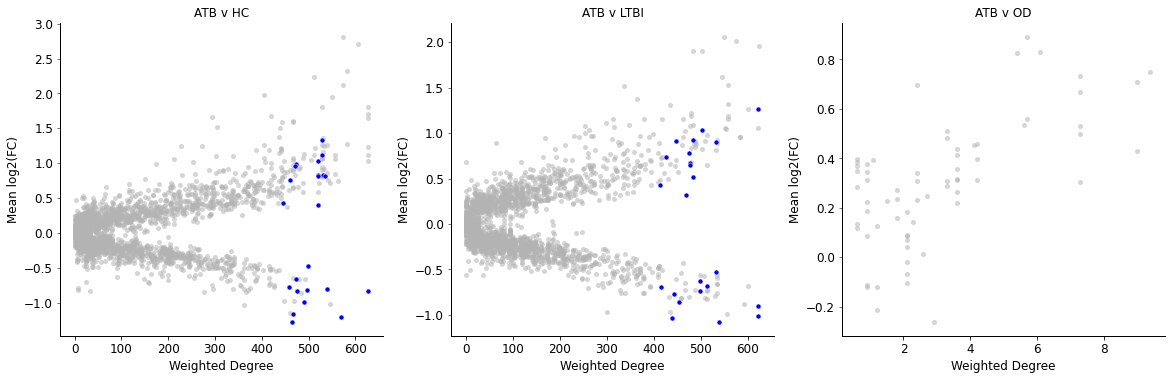

In [57]:
plot_logFC_v_meanlogFC_all_networks(ATB_HC_and_ATB_LTBI, 'ATB_HC_and_ATB_LTBI')

In [58]:
for gene_i in ATB_HC_and_ATB_LTBI:
    print(gene_i + ', ')

TNFSF10, 
DYSF, 
IL1B, 
GK, 
LHFPL2, 
TRIM22, 
SPOCK2, 
TMEM204, 
IL7R, 
GPR183, 
CLEC4D, 
TNFSF13B, 
PLAUR, 
ID3, 
LY96, 
CD6, 
KLRB1, 
PIK3IP1, 
CCR7, 
FBXO6, 
KCNJ15, 
NELL2, 
SKAP1, 


(ATB_HC $\cap$ ATB_OD) - ATB_LTBI

In [59]:
ATB_HC_and_ATB_OD = top_N_nodes_ATB_HC.intersection(top_N_nodes_ATB_OD) - top_N_nodes_ATB_LTBI

#pickle list of nodes for downstream analysis
with open(f'{pickled_objects_dir}Network Files/top weighted node lists/ATB_HC_and_ATB_OD.pkl', 'wb') as f:
    pickle.dump(list(ATB_HC_and_ATB_OD), f)

In [60]:
len(ATB_HC_and_ATB_OD)

7

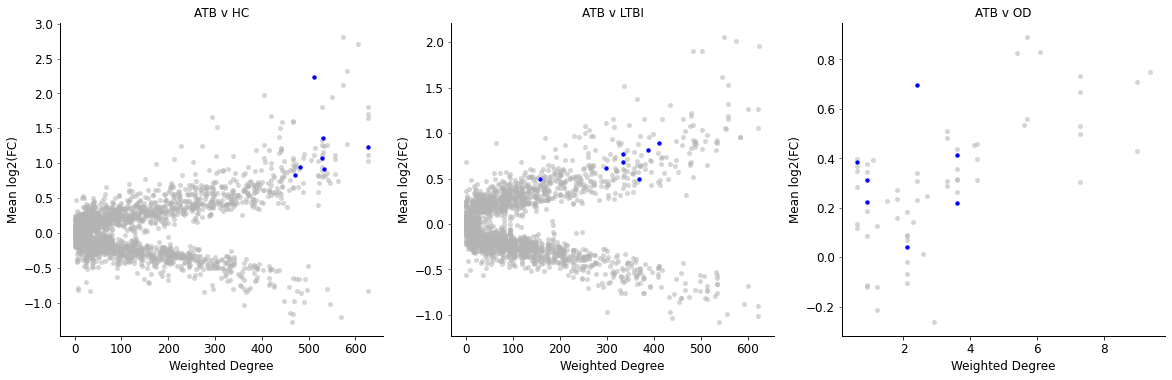

In [61]:
plot_logFC_v_meanlogFC_all_networks(ATB_HC_and_ATB_OD, 'ATB_HC_and_ATB_OD')

(ATB_LTBI $\cap$ ATB_OD) - ATB_HC

In [62]:
ATB_LTBI_and_ATB_OD = top_N_nodes_ATB_LTBI.intersection(top_N_nodes_ATB_OD) - top_N_nodes_ATB_HC

#pickle list of nodes for downstream analysis
with open(f'{pickled_objects_dir}Network Files/top weighted node lists/ATB_LTBI_and_ATB_OD.pkl', 'wb') as f:
    pickle.dump(list(ATB_LTBI_and_ATB_OD), f)

In [63]:
len(ATB_LTBI_and_ATB_OD)

3

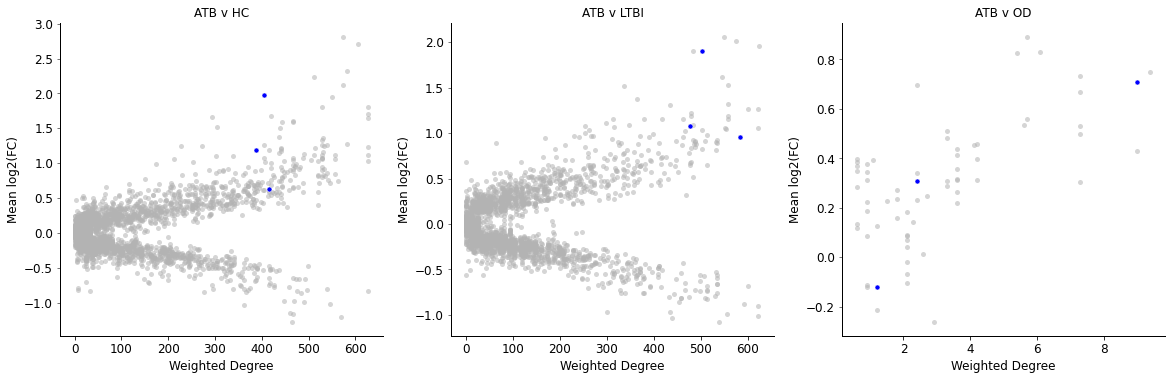

In [64]:
plot_logFC_v_meanlogFC_all_networks(ATB_LTBI_and_ATB_OD, 'ATB_LTBI_and_ATB_OD')

### [3.3] top nodes (genes) in all 3 networks

ATB_LTBI $\cap$ ATB_OD $\cap$ ATB_HC

In [65]:
ATB_HC_and_ATB_LTBI_and_ATB_OD = top_N_nodes_ATB_HC.intersection(top_N_nodes_ATB_LTBI.intersection(top_N_nodes_ATB_OD))

#pickle list of nodes for downstream analysis
with open(f'{pickled_objects_dir}Network Files/top weighted node lists/ATB_HC_and_ATB_LTBI_and_ATB_OD.pkl', 'wb') as f:
    pickle.dump(list(ATB_HC_and_ATB_LTBI_and_ATB_OD), f)

In [66]:
len(ATB_HC_and_ATB_LTBI_and_ATB_OD)

24

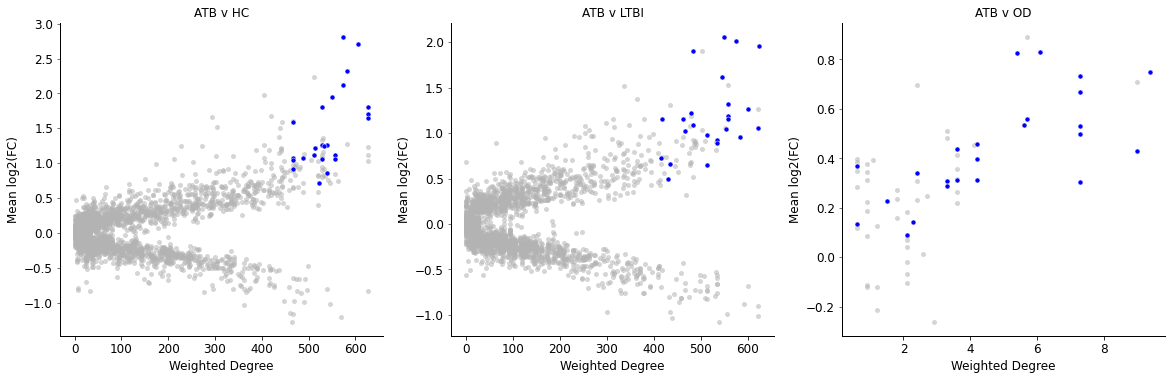

In [67]:
plot_logFC_v_meanlogFC_all_networks(ATB_HC_and_ATB_LTBI_and_ATB_OD, 'ATB_HC_and_ATB_LTBI_and_ATB_OD')

In [68]:
for gene_i in ATB_HC_and_ATB_LTBI_and_ATB_OD:
    print(gene_i + ', ')

GBP5, 
IFIT3, 
LAP3, 
VAMP5, 
PSTPIP2, 
C1QB, 
DUSP3, 
CEACAM1, 
WARS, 
XAF1, 
SERPING1, 
GBP4, 
BATF2, 
ANKRD22, 
TLR5, 
SMARCD3, 
ADM, 
AIM2, 
FCGR1B, 
FAM26F, 
EPSTI1, 
GBP1, 
IFITM3, 
ANXA3, 


### [3.4] How do other *gene signatures* compare?

#### Zak 2016 Lancet (16-gene signature)

In [69]:
zak_et_al_2016 = ['ANKRD22','APOL1','BATF2','ETV7','FCGR1A','FCGR1B','GBP1','GBP2','GBP4','GBP5','SCARF1','SEPT4','SERPING1','STAT1','TAP1','TRAFD1']

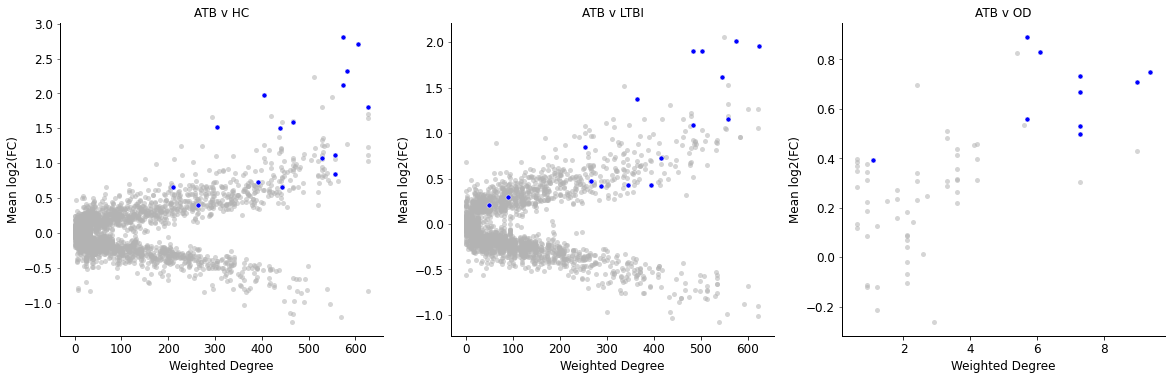

In [70]:
plot_logFC_v_meanlogFC_all_networks(zak_et_al_2016, 'zak_et_al_2016')

#### Sweeney 2016 Lancet Respiratory (3-gene signature)

In [71]:
sweeney_et_al_2016 = ['GBP5','DUSP3','KLF2']

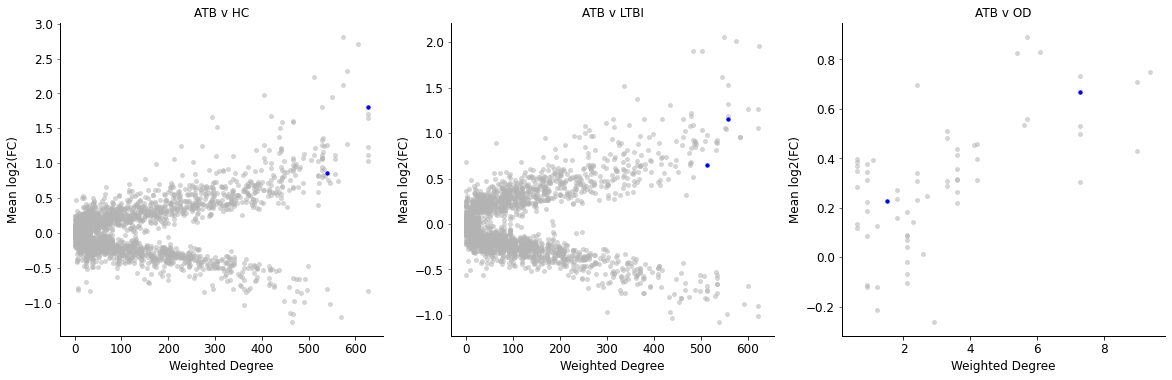

In [72]:
plot_logFC_v_meanlogFC_all_networks(sweeney_et_al_2016, 'sweeney_et_al_2016')

**GBP5** and **DUSP3** are in all networks; **KLF2** is in none of the networks

#### Sambarey 2016 EBioMedicine (10-gene signature)

In [73]:
sambarey_et_al_2016 = ['FCGR1A','HK3','RAB13','RBBP8','IFI44L','TIMM10','BCL6','SMARCD3','CYP4F3','SLPI']

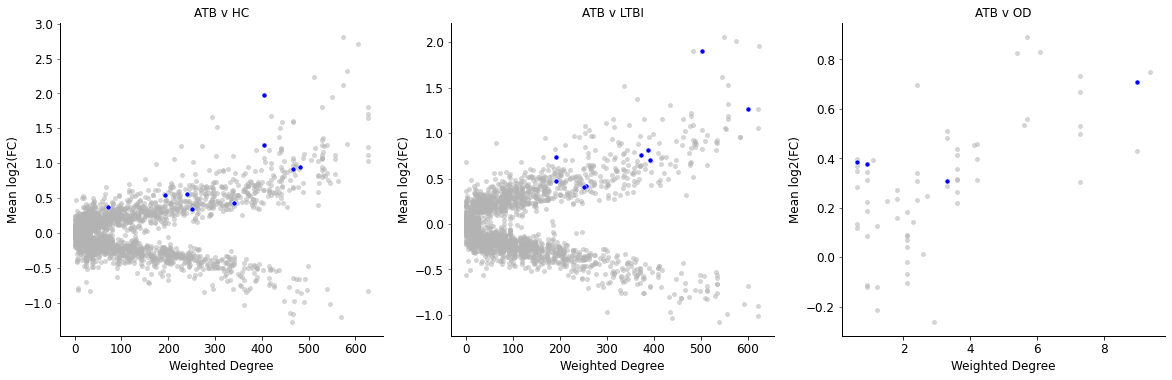

In [74]:
plot_logFC_v_meanlogFC_all_networks(sambarey_et_al_2016, 'sambarey_et_al_2016')

#### Verhagen 2013 BMC Genomics (10-gene signature)

In [75]:
verhagen_et_al_2013 = ['CHRM2','AMPH','SNX17','PIGC','S100P','TAS2R46','STYXL1','HBD','GLDC','ACOT7']

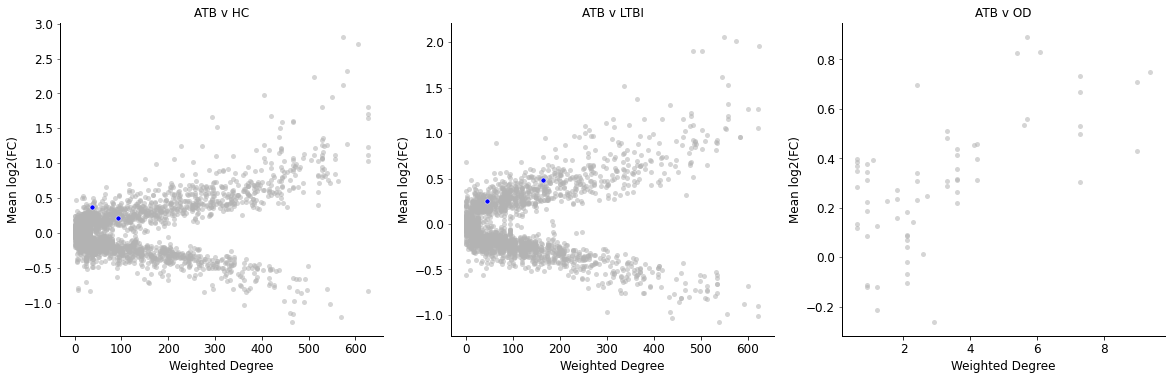

In [76]:
plot_logFC_v_meanlogFC_all_networks(verhagen_et_al_2013, 'verhagen_et_al_2013')

#### Leong 2018 Tuberculosis (24-gene signature)

In [77]:
leong_et_al_2018 = ['HIRIP3','LNX2','METAP1','PPCS','SPTSSA','PLEKHA1','DAPP1','TMEM63A','SIN3A','WSB2','ANXA5','SERPING1','LBH','CPVL','S1PR1','PLAC8','TXN','VPS29','BATF2','RAB34','DNAJC1','HPS4','EXD2','SWSAP1']

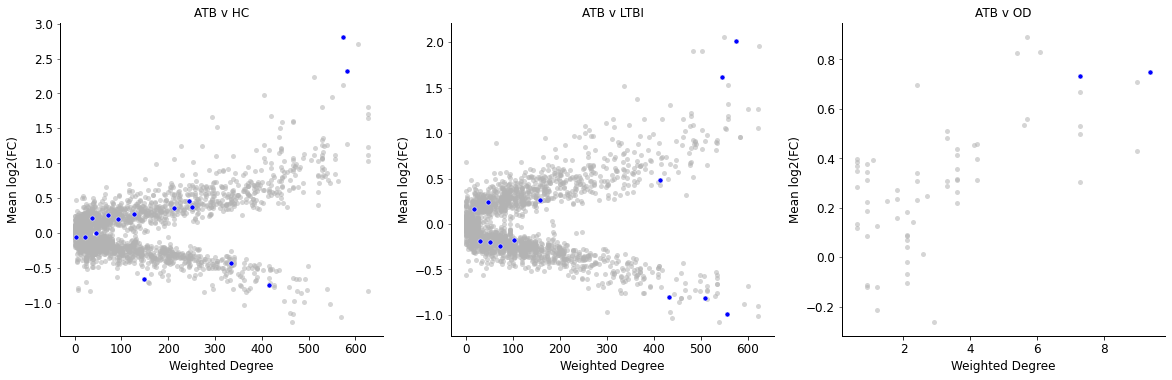

In [78]:
plot_logFC_v_meanlogFC_all_networks(leong_et_al_2018, 'leong_et_al_2018')

#### Maertzdorf 2016 EMBO Molecular Medicine (15-gene signature)

In [79]:
maertzdorf_et_al_2016 = ['CNIH4','GBP1','P2RY14','PCNXL2','CD274','FCGR1C','GBP5','S100A8','ID3','DHRS9','FBXL5','FAM26F','BATF2','CD96','FCGR1A']

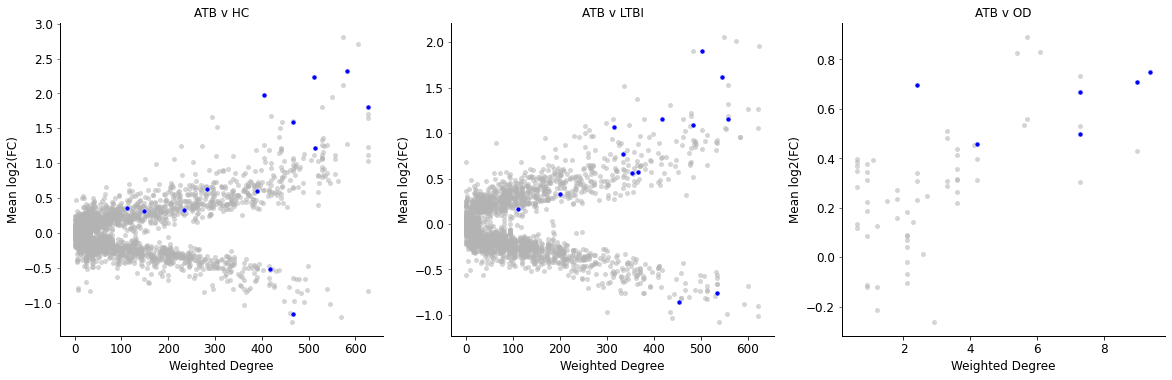

In [80]:
plot_logFC_v_meanlogFC_all_networks(maertzdorf_et_al_2016, 'maertzdorf_et_al_2016')